In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datadir = '/Users/jiatongyang/Documents/GitHub/Jiatong-Yang/class projects/8.711 Nuclear Physics /nndc_data/'
outdir = '/Users/jiatongyang/Documents/GitHub/Jiatong-Yang/class projects/8.711 Nuclear Physics /plots/'

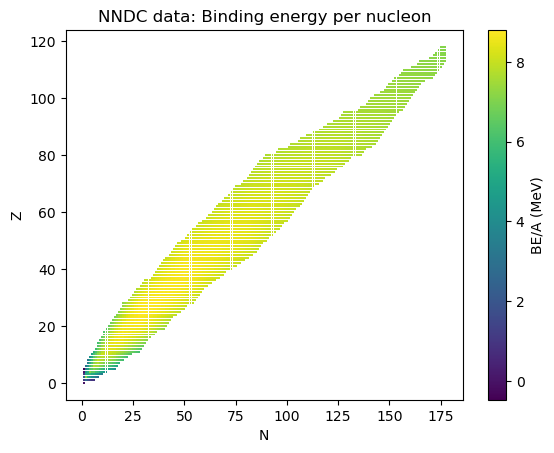

<Figure size 640x480 with 0 Axes>

In [81]:
# Read the CSV file
df = pd.read_csv(datadir+'BE_per_nucleon.csv', header=0, index_col=False)


# Extract the required columns
neutron_number = df['n']
proton_number = df['z']
binding_energy = df['bindingEnergy(keV)']

# Plot the heatmap

plt.scatter(neutron_number, proton_number, c=binding_energy/1e3, cmap='viridis', s=2, marker='s', edgecolors='none')
plt.colorbar(label='BE/A (MeV)')
plt.xlabel('N')
plt.ylabel('Z')
plt.title('NNDC data: Binding energy per nucleon')
plt.show()
plt.savefig(outdir+'BE_per_nucleon_nndc.pdf')


In [82]:
# Liquid drop model: plot BE/A as a function of N and Z

# Define the parameters
a_vol = 16
a_surf = 17
a_coul = 0.6
a_sym = 25
A = neutron_number + proton_number
pairing_term = np.zeros(len(A))
for i in range(len(A)):
    if A[i] % 2 == 1:
        pairing_term[i] = 0
    elif neutron_number[i] % 2 == 0 and proton_number[i] % 2 == 0:
        pairing_term[i] = 25/A[i]
    else:
        pairing_term[i] = -25/A[i]

# Liquid drop model
BE_liquid_drop = (a_vol*A - a_surf*A**(2/3) - a_coul*proton_number**2/A**(1/3) - a_sym*(proton_number-neutron_number)**2/A + pairing_term)/A

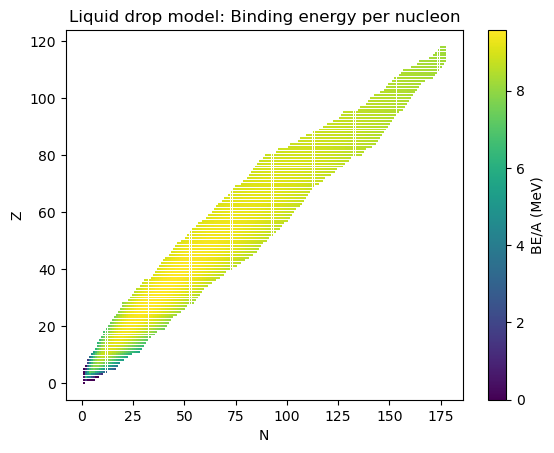

<Figure size 640x480 with 0 Axes>

In [83]:
# Plot the heatmap of the liquid drop model

plt.scatter(neutron_number, proton_number, c=BE_liquid_drop, cmap='viridis', s=2, marker='s', edgecolors='none',\
            vmin = 0, vmax=np.max(BE_liquid_drop))
plt.colorbar(label='BE/A (MeV)')
plt.xlabel('N')
plt.ylabel('Z')
plt.title('Liquid drop model: Binding energy per nucleon')
plt.show()
plt.savefig(outdir+'BE_per_nucleon_liquid_drop.pdf')

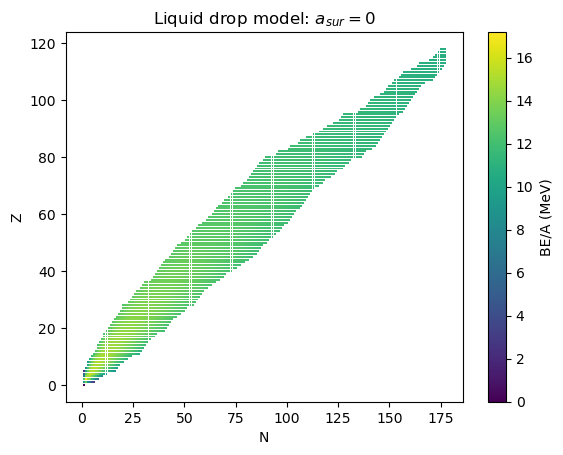

<Figure size 640x480 with 0 Axes>

In [84]:
plt.scatter(neutron_number, proton_number, c=(BE_liquid_drop*A+a_surf*A**(2/3))/A, cmap='viridis', s=2, marker='s', edgecolors='none', \
            vmin = 0)
plt.colorbar(label='BE/A (MeV)')
plt.xlabel('N')
plt.ylabel('Z')
plt.title(r'Liquid drop model: $a_{sur}=0$')
plt.show()
plt.savefig(outdir+'BE_per_nucleon_liquid_drop_zero_surface.pdf')

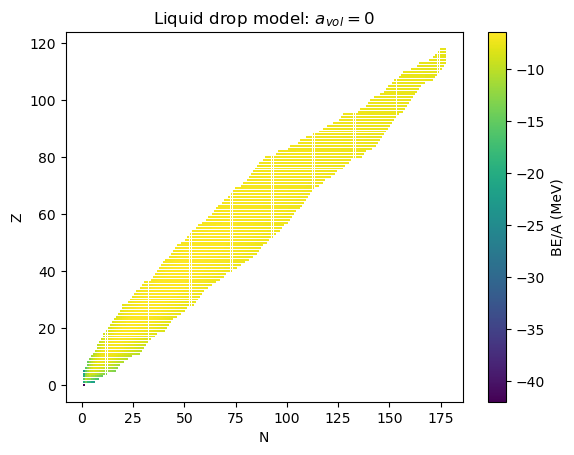

<Figure size 640x480 with 0 Axes>

In [85]:
plt.scatter(neutron_number, proton_number, c=(BE_liquid_drop*A-a_vol*A)/A, cmap='viridis', s=2, marker='s', edgecolors='none')
plt.colorbar(label='BE/A (MeV)')
plt.xlabel('N')
plt.ylabel('Z')
plt.title(r'Liquid drop model: $a_{vol}=0$')
plt.show()
plt.savefig(outdir+'BE_per_nucleon_liquid_drop_zero_volume.pdf')

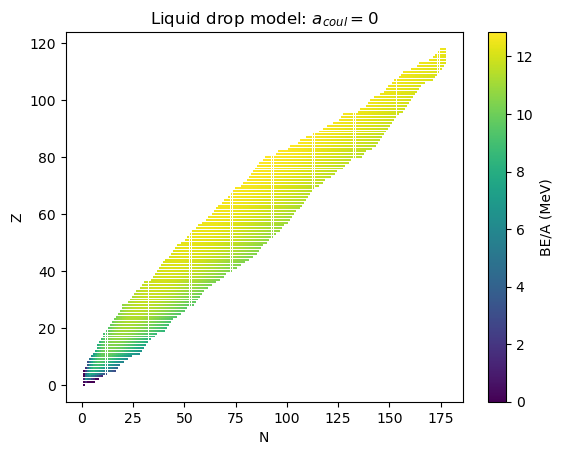

<Figure size 640x480 with 0 Axes>

In [86]:
plt.scatter(neutron_number, proton_number, c=(BE_liquid_drop*A+a_coul*proton_number**2/A**(1/3))/A, cmap='viridis', s=2, marker='s', edgecolors='none',
            vmin = 0)
plt.colorbar(label='BE/A (MeV)')
plt.xlabel('N')
plt.ylabel('Z')
plt.title(r'Liquid drop model: $a_{coul}=0$')
plt.show()
plt.savefig(outdir+'BE_per_nucleon_liquid_drop_zero_coul.pdf')

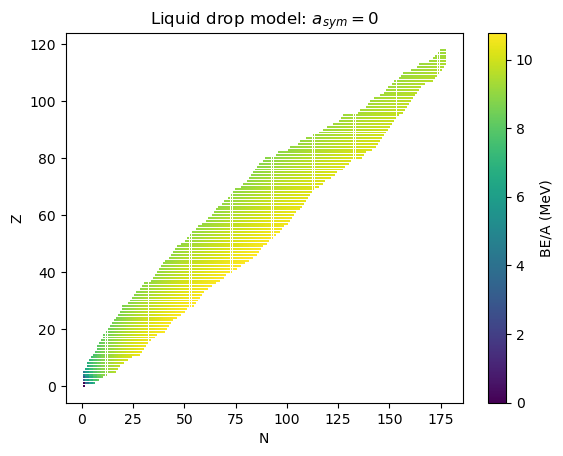

<Figure size 640x480 with 0 Axes>

In [87]:
plt.scatter(neutron_number, proton_number, c=(BE_liquid_drop*A+a_sym*(proton_number-neutron_number)**2/A)/A, cmap='viridis', s=2, marker='s', edgecolors='none',
            vmin = 0)
plt.colorbar(label='BE/A (MeV)')
plt.xlabel('N')
plt.ylabel('Z')
plt.title(r'Liquid drop model: $a_{sym}=0$')
plt.show()
plt.savefig(outdir+'BE_per_nucleon_liquid_drop_zero_sym.pdf')

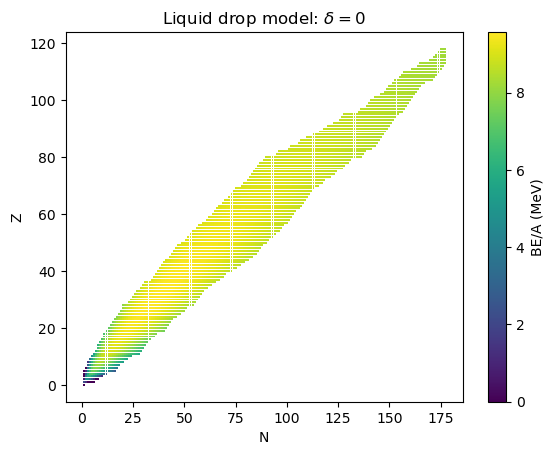

<Figure size 640x480 with 0 Axes>

In [92]:
plt.scatter(neutron_number, proton_number, c=(BE_liquid_drop*A-pairing_term)/A, cmap='viridis', s=2, marker='s', edgecolors='none',
            vmin=0)
plt.colorbar(label='BE/A (MeV)')
plt.xlabel('N')
plt.ylabel('Z')
plt.title(r'Liquid drop model: $\delta=0$')
plt.show()
plt.savefig(outdir+'BE_per_nucleon_liquid_drop_zero_pairing.pdf')

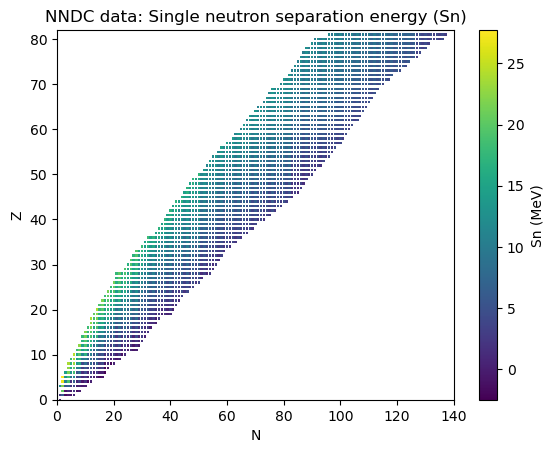

<Figure size 640x480 with 0 Axes>

In [15]:
# Read the CSV file
df_Sn = pd.read_csv(datadir+'nndc_Sn.csv', header=0, index_col=False)

# Extract the required columns
n_Sn = df_Sn['n']
z_Sn = df_Sn['z']
Sn = df_Sn['neutronSeparationEnergy(keV)']

# Plot the heatmap

plt.scatter(n_Sn, z_Sn, c=Sn/1e3, cmap='viridis', s=3, marker='s', edgecolors='none')
plt.colorbar(label='Sn (MeV)')
plt.xlabel('N')
plt.ylabel('Z')
plt.title('NNDC data: Single neutron separation energy (Sn)')
plt.ylim(0,82)
plt.xlim(0,140)
plt.show()
plt.savefig(outdir+'Sn_nndc.pdf')


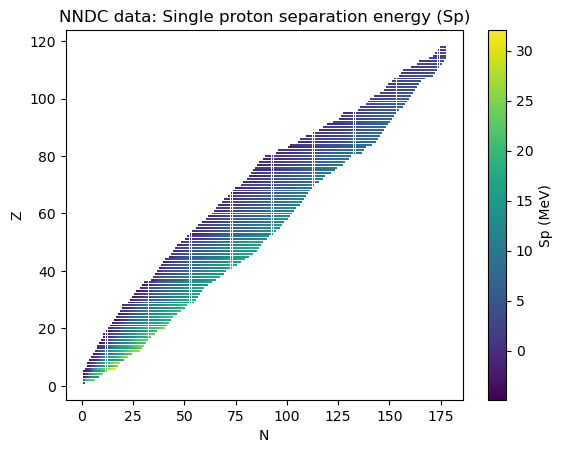

<Figure size 640x480 with 0 Axes>

In [17]:
# Read the CSV file
df_Sp = pd.read_csv(datadir+'nndc_Sp.csv', header=0, index_col=False)

# Extract the required columns
n_Sp = df_Sp['n']
z_Sp = df_Sp['z']
Sp = df_Sp['protonSeparationEnergy(keV)']

# Plot the heatmap

plt.scatter(n_Sp, z_Sp, c=Sp/1e3, cmap='viridis', s=2, marker='s', edgecolors='none')
plt.colorbar(label='Sp (MeV)')
plt.xlabel('N')
plt.ylabel('Z')
plt.title('NNDC data: Single proton separation energy (Sp)')
plt.show()
plt.savefig(outdir+'Sp_nndc.pdf')


In [24]:
# calculate the single neutron separation energy and single proton separation energy using the liquid drop model

# First calculate the total binding energy with one fewer neutron or proton

def BE_liquid_drop(n,z):
    A = n+z
    pairing_term = np.zeros(len(A))
    for i in range(len(A)):
        if A[i] % 2 == 1:
            pairing_term[i] = 0
        elif n[i] % 2 == 0 and z[i] % 2 == 0:
            pairing_term[i] = 25/A[i]
        else:
            pairing_term[i] = -25/A[i]
    return (a_vol*A - a_surf*A**(2/3) - a_coul*z**2/A**(1/3) - a_sym*(z-n)**2/A + pairing_term)
    


# Single neutron separation energy
Sn_liquid_drop = BE_liquid_drop(n_Sn, z_Sn) - BE_liquid_drop(n_Sn-1, z_Sn)

# Single proton separation energy
Sp_liquid_drop = BE_liquid_drop(n_Sp, z_Sp) - BE_liquid_drop(n_Sp, z_Sp-1)


/var/folders/zl/jljnm9551gq_2d9_zry_48_m0000gn/T/ipykernel_28759/1740646450.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  pairing_term[i] = 25/A[i]


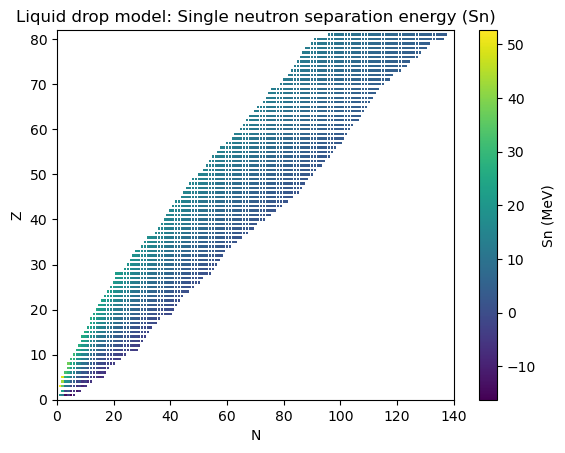

<Figure size 640x480 with 0 Axes>

In [33]:
# plot the liquid drop model for single neutron separation energy

plt.scatter(n_Sn, z_Sn, c=Sn_liquid_drop, cmap='viridis', s=3, marker='s', edgecolors='none')
plt.colorbar(label='Sn (MeV)')
plt.xlabel('N')
plt.ylabel('Z')
plt.title('Liquid drop model: Single neutron separation energy (Sn)')
plt.ylim(0,82)
plt.xlim(0,140)
plt.show()
plt.savefig(outdir+'Sn_liquid_drop.pdf')

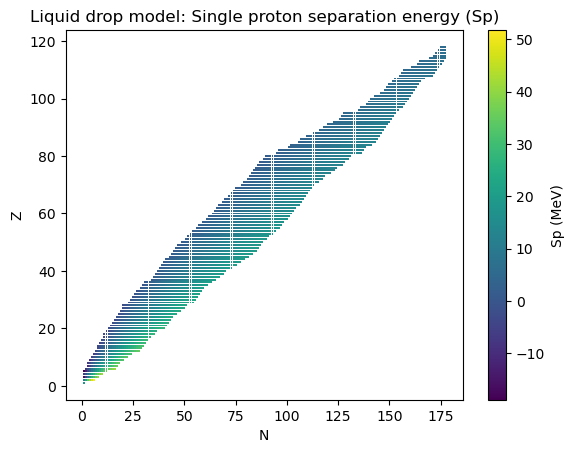

<Figure size 640x480 with 0 Axes>

In [28]:
# plot the liquid drop model for single proton separation energy

plt.scatter(n_Sp, z_Sp, c=Sp_liquid_drop, cmap='viridis', s=2, marker='s', edgecolors='none')
plt.colorbar(label='Sp (MeV)')
plt.xlabel('N')
plt.ylabel('Z')
plt.title('Liquid drop model: Single proton separation energy (Sp)')
plt.show()
plt.savefig(outdir+'Sp_liquid_drop.pdf')


In [45]:
# Plot the stable nuclei from NNDC data

# Read the CSV file
df_stable = pd.read_csv(datadir+'nndc_half_life.csv', header=0, index_col=False)

# Extract the required columns
n_stable = df_stable['n']
z_stable = df_stable['z']
half_life = df_stable['halflife(Seconds)']

# select the stable nuclei: the ones with half_life == 'stable'

n_stable = n_stable[half_life.str.contains('STABLE')]
z_stable = z_stable[half_life.str.contains('STABLE')]



In [46]:
# Find the stable nuclei in the liquid drop model: find the nuclei with the largest binding energy per nucleon for each A
# Do not use the nndc data, but use the liquid drop model to find the stable nuclei

A_unique = np.unique(A)

BE_per_A = BE_liquid_drop(neutron_number, proton_number)/A

n_liquid_drop_stable = np.zeros(len(A_unique))
z_liquid_drop_stable = np.zeros(len(A_unique))

for i in range(len(A_unique)):
    A_i = A_unique[i]
    n_i = neutron_number[A == A_i]
    z_i = proton_number[A == A_i]
    BE_i = BE_per_A[A == A_i]
    max_BE_i = np.max(BE_i)

    # Then find the index of the maximum BE/A in the original array
    max_index = np.where(BE_i == max_BE_i)[0][0]
    n_liquid_drop_stable[i] = n_i[max_index]
    z_liquid_drop_stable[i] = z_i[max_index]


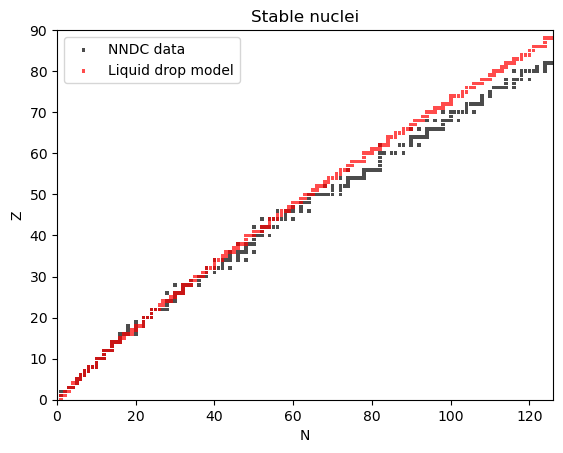

<Figure size 640x480 with 0 Axes>

In [79]:

# Plot the stable nuclei z vs n

plt.scatter(n_stable, z_stable, c='k', s=7, marker='s', edgecolors='none', label='NNDC data', alpha=0.7)
plt.scatter(n_liquid_drop_stable, z_liquid_drop_stable, c='r', s=7, marker='s', edgecolors='none', label='Liquid drop model', alpha=0.7)
plt.xlabel('N')
plt.ylabel('Z')
plt.title('Stable nuclei')
plt.xlim(0,np.max(n_stable))
plt.ylim(0,90)
plt.legend(loc='upper left')
plt.show()
plt.savefig(outdir+'stable_nuclei.pdf')

In [65]:
def BE_liquid_drop_single_point(n,z):
    A = n+z
    pairing_term = 0
    if A % 2 == 1:
        pairing_term = 0
    elif n % 2 == 0 and z % 2 == 0:
        pairing_term = 25/A
    else:
        pairing_term = -25/A
    return a_vol*A - a_surf*A**(2/3) - a_coul*z**2/A**(1/3) - a_sym*(z-n)**2/A + pairing_term

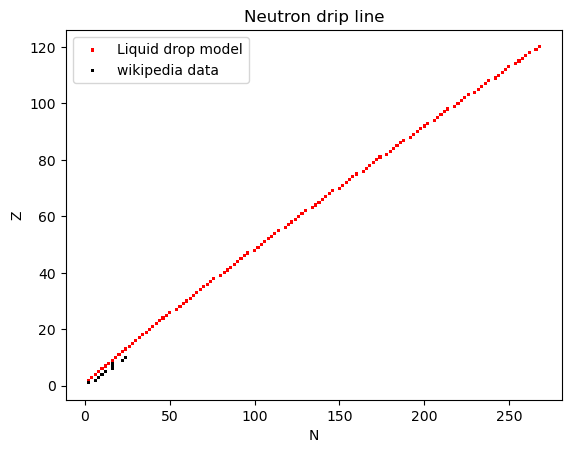

<Figure size 640x480 with 0 Axes>

In [74]:
# Find neutron drip line up to Z = 120
# Neutron drip line is defined as the point where the single neutron separation energy becomes negative

z_neutron_drip = np.linspace(1,120,120, endpoint=True)
n_neutron_drip = np.zeros(len(z_neutron_drip))

for i in range(len(z_neutron_drip)):
    n_i = z_neutron_drip[i]
    while BE_liquid_drop_single_point(n_i, z_neutron_drip[i]) - BE_liquid_drop_single_point(n_i-1, z_neutron_drip[i]) > 0:
        n_i += 1
    n_neutron_drip[i] = n_i-1

# Plot the neutron drip line
plt.scatter(n_neutron_drip, z_neutron_drip, c='r', s=5, marker='s', edgecolors='none', label='Liquid drop model')

# Neutron drip line data:
z_neutron_drip_data = np.linspace(1,10,10, endpoint=True)
n_neutron_drip_data = np.array([2, 6, 8, 10, 12, 16, 16, 16, 22, 24])

plt.scatter(n_neutron_drip_data, z_neutron_drip_data, c='k', s=5, marker='s', edgecolors='none', label='wikipedia data')
plt.xlabel('N')
plt.ylabel('Z')
plt.title('Neutron drip line')
plt.legend(loc='upper left')
plt.show()
plt.savefig(outdir+'neutron_drip_line.pdf')


In [76]:
# Print the neutron drip line for oxygen (z=8) and fluorine (z=9)

print('Oxygen:', 'N =', n_neutron_drip[z_neutron_drip == 8][0], 'A =', 8+n_neutron_drip[z_neutron_drip == 8][0])
print('Flourine:', 'N =', n_neutron_drip[z_neutron_drip == 9][0], 'A =', 9+n_neutron_drip[z_neutron_drip == 9][0])
print('Hydrogen:', 'N =', n_neutron_drip[z_neutron_drip == 1][0], 'A =', 1+n_neutron_drip[z_neutron_drip == 1][0])
print('Helium:', 'N =', n_neutron_drip[z_neutron_drip == 2][0], 'A =', 2+n_neutron_drip[z_neutron_drip == 2][0])
print('Lithium:', 'N =', n_neutron_drip[z_neutron_drip == 3][0], 'A =', 3+n_neutron_drip[z_neutron_drip == 3][0])
print('Beryllium:', 'N =', n_neutron_drip[z_neutron_drip == 4][0], 'A =', 4+n_neutron_drip[z_neutron_drip == 4][0])

Oxygen: N = 14.0 A = 22.0
Flourine: N = 16.0 A = 25.0
Hydrogen: N = 2.0 A = 3.0
Helium: N = 2.0 A = 4.0
Lithium: N = 4.0 A = 7.0
Beryllium: N = 6.0 A = 10.0


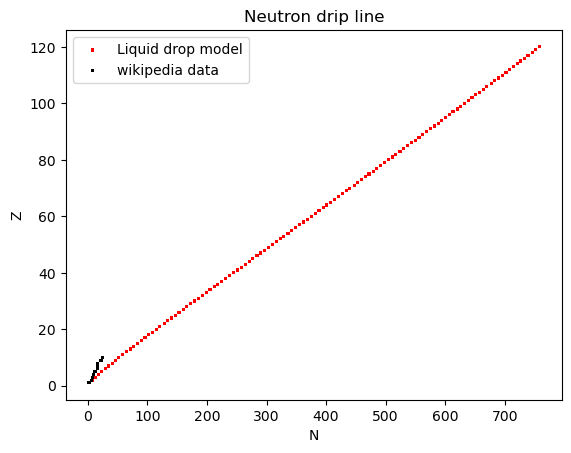

<Figure size 640x480 with 0 Axes>

In [63]:
# Find neutron drip line up to Z = 120
# Neutron drip line is defined as the point where the total binding energy becomes negative

z_neutron_drip = np.linspace(1,120,120, endpoint=True)
n_neutron_drip = np.zeros(len(z_neutron_drip))

for i in range(len(z_neutron_drip)):
    n_i = z_neutron_drip[i]
    while BE_liquid_drop_single_point(n_i, z_neutron_drip[i]) > 0:
        n_i += 1
    n_neutron_drip[i] = n_i

# Plot the neutron drip line
plt.scatter(n_neutron_drip, z_neutron_drip, c='r', s=5, marker='s', edgecolors='none', label='Liquid drop model')

# Neutron drip line data:
z_neutron_drip_data = np.linspace(1,10,10, endpoint=True)
n_neutron_drip_data = np.array([2, 6, 8, 10, 12, 16, 16, 16, 22, 24])

plt.scatter(n_neutron_drip_data, z_neutron_drip_data, c='k', s=5, marker='s', edgecolors='none', label='wikipedia data')
plt.xlabel('N')
plt.ylabel('Z')
plt.title('Neutron drip line')
plt.legend(loc='upper left')
plt.show()
plt.savefig(outdir+'neutron_drip_line.pdf')


In [64]:
# Print the neutron drip line for oxygen (z=8) and fluorine (z=9)

print('Oxygen:', 'N =', n_neutron_drip[z_neutron_drip == 8][0], 'A =', 8+n_neutron_drip[z_neutron_drip == 8][0])
print('Flourine:', 'N =', n_neutron_drip[z_neutron_drip == 9][0], 'A =', 9+n_neutron_drip[z_neutron_drip == 9][0])

Oxygen: N = 41.0 A = 49.0
Flourine: N = 46.0 A = 55.0
